# Lab: Student Grade Prediction

The data used here represents the student achievement in secondary education of two Portuguese schools. The data includes student grades, demographic, social, and school-related features, and it was collected by using school reports and questionnaires. A dataset is provided that describes the results of the mathematics class. The feature "G3" is the final year grade that needs to be predicted, while features "G1" and "G2" are the 1st and 2nd period grades. Since "G1" and "G2" are also grades, just at different periods, it will be much easier to predict "G3" since they are highly correlated. But it is more useful to predict "G3" without "G1" and "G2". 

## Feature information

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

Grades: 

1. G1 - first period grade (numeric: from 0 to 20)
2. G2 - second period grade (numeric: from 0 to 20)
3. G3 - final grade (numeric: from 0 to 20, output target)

## Objective

In this lab, we will use the features provided to predict the final grades (G3) of the students for mathematics class. There are ways to make this into a classification problem, but we will be focusing on regression problem in this guide, predicting the raw scores of the students. 

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import scipy

### Importing the data

In [2]:
student = pd.read_csv('student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Below is to demonstrate a student's question. 

In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
student_1 = student.select_dtypes(exclude=['object'])
student_1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [5]:
student_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         395 non-null    int64
 1   Medu        395 non-null    int64
 2   Fedu        395 non-null    int64
 3   traveltime  395 non-null    int64
 4   studytime   395 non-null    int64
 5   failures    395 non-null    int64
 6   famrel      395 non-null    int64
 7   freetime    395 non-null    int64
 8   goout       395 non-null    int64
 9   Dalc        395 non-null    int64
 10  Walc        395 non-null    int64
 11  health      395 non-null    int64
 12  absences    395 non-null    int64
 13  G1          395 non-null    int64
 14  G2          395 non-null    int64
 15  G3          395 non-null    int64
dtypes: int64(16)
memory usage: 49.5 KB


In [6]:
student.shape

(395, 33)

There is a total of 395 students and 33 features including 3 grade features. Final grade is shown in the feature "G3".

In [7]:
student['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

It seems like the maximum grade for the exam is 20. 

### Data analysis

Let's look at the grades according to the number of students who scored them. 

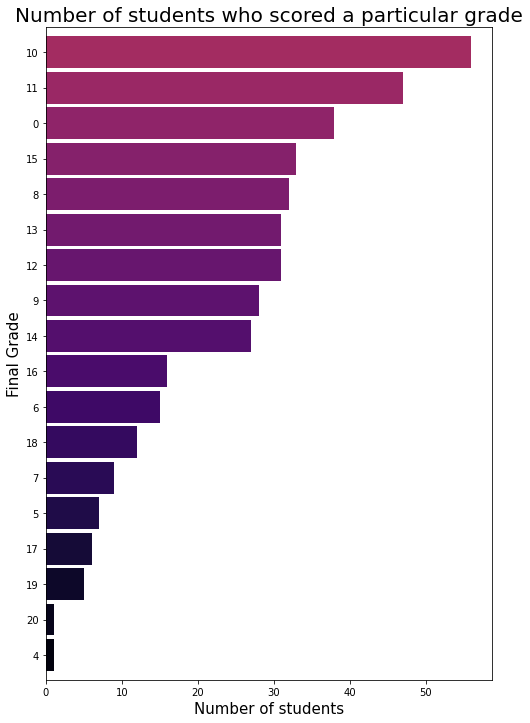

In [8]:
plt.subplots(figsize=(8, 12))
grade_counts = student['G3'].value_counts().sort_values().plot.barh(width=.9, color=sns.color_palette('inferno', 40))
grade_counts.axes.set_title('Number of students who scored a particular grade', fontsize=20)
grade_counts.set_xlabel('Number of students', fontsize=15)
grade_counts.set_ylabel('Final Grade', fontsize=15)
plt.show()

We can further elaborate on this by graphing the final grade distribution. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


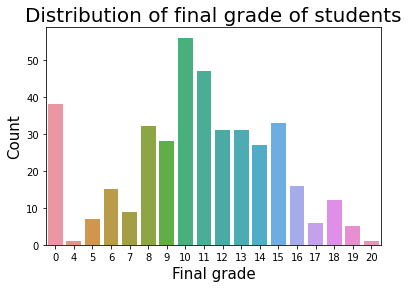

In [9]:
b = sns.countplot(student['G3'])
b.axes.set_title('Distribution of final grade of students', fontsize=20)
b.set_xlabel('Final grade', fontsize=15)
b.set_ylabel('Count', fontsize=15)
plt.show()

Apart from the high number of students scoring 0, the distribution is normal as expected, mainly clustering near the score of 10. Perhaps the number 0 is used in place of null. Or maybe the students who did not appear for the exam, or were not allowed to sit for the exam due to some reason are marked as 0. Let's check the table for null values first. 

In [10]:
student.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

None of the features has null values so maybe grade 0 does not mean null after all. It most likely refers to students that actually got 0 for their exams or were not able to take the exam. 

Let's take a look at the gender feature and determine if it shows any interesting phenomena. 

In [11]:
male_studs = len(student[student['sex'] == 'M'])
female_studs = len(student[student['sex'] == 'F'])

print('Number of male students: ', male_studs)
print('Number of female students: ', female_studs)

Number of male students:  187
Number of female students:  208


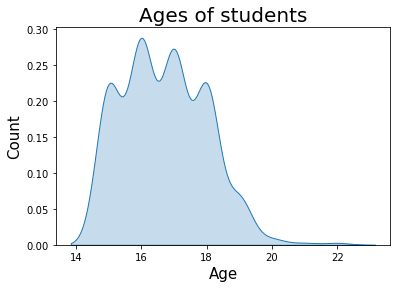

In [12]:
b = sns.kdeplot(student['age'], shade=True)
b.axes.set_title('Ages of students', fontsize=20)
b.set_xlabel('Age', fontsize=15)
b.set_ylabel('Count', fontsize=15)
plt.show()

Checking the distribution of age along with gender. We can show this using histograms. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


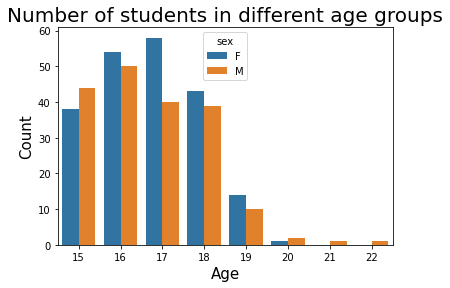

In [13]:
b = sns.countplot('age', hue='sex', data=student)
b.axes.set_title('Number of students in different age groups', fontsize=20)
b.set_xlabel('Age', fontsize=15)
b.set_ylabel('Count', fontsize=15)
plt.show()

The ages seem to be ranging from 15 - 19. The students above that age may not necessarily be outliers but students with year drops. Also, the gender distribution is pretty even. Therefore, there are no outliers even though there are some students with much higher ages than the rest. 

Does age have anything to do with the final grade? 

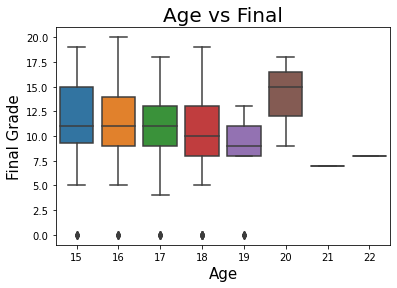

In [14]:
b = sns.boxplot(x='age', y='G3', data=student)
b.axes.set_title('Age vs Final', fontsize = 20)
b.set_xlabel('Age', fontsize = 15)
b.set_ylabel('Final Grade', fontsize = 15)
plt.show()

This standard boxplot showing the statistics does not really tell the entire story. So we instead plot the distribution rather than the statistics. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


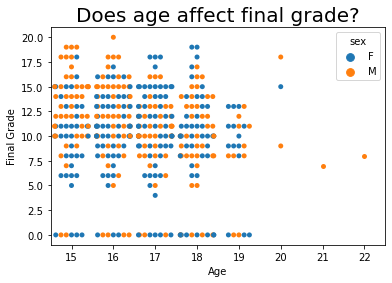

In [15]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=student)
b.axes.set_title('Does age affect final grade?', fontsize = 20)
b.set_xlabel('Age', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

This plot shows more story. We see that age 20 has only 3 data points hence the inconsistency in statistics. Otherwise, there seems to be no clear relation of age or gender with final grade. 

We can also see if there are differences in grades between urban and rural areas.  

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


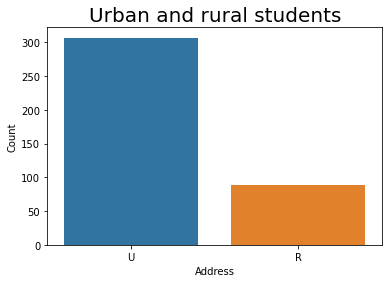

In [16]:
b = sns.countplot(student['address'])
b.axes.set_title('Urban and rural students', fontsize = 20)
b.set_xlabel('Address', fontsize = 10)
b.set_ylabel('Count', fontsize = 10)
plt.show()

Most of the students are from urban areas, but do urban students perform better than rural students? 

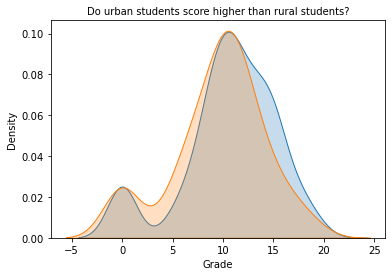

In [17]:
# Grade distribution by address
sns.kdeplot(student.loc[student['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(student.loc[student['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 10)
plt.xlabel('Grade', fontsize = 10);
plt.ylabel('Density', fontsize = 10)
plt.show()

Blue is urban and orange is rural. The graph shows that there is not much difference between the scores based on location. A slight discrepancy exists between the two distributions, but it does not warrant some certain explanations. 

### One-hot encoding and feature selection

Categorical features in the dataset are in the form of strings. As we all know, machine learning cannot work well with string format data points, so we need to convert these features into numerical labels. One-hot encoding is one of the methods to convert some categorical feature into numerical features. It basically creates dummy variables representing the original features. 

In [18]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [19]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Most of the features as object types are categorical features represented in strings. As an example, we can perform one-hot encoding on only the categorical features to determine how it will look after transformation. 

In [20]:
category_df = student.select_dtypes(include=['object'])

dummy_df = pd.get_dummies(category_df)
dummy_df['G3'] = student['G3']

In [21]:
dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,6
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,6
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,10
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,15
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,10


As we can see, the categorical features are converted into 43 (44 features minus one target feature) new dummy variables, with each new feature representing one unique value of the categorical features. 

We can apply one-hot coding and perform correlation analysis as a naive basis to select features to be used for regression. Although relying on correlation analysis only for feature selection is not the ideal way to do it, in this lab, we will determine if there are any noticeable differences in selecting features this way. 

Furthermore, although G1 and G2 are periodic grades and are highly correlated to final grade G3 as they are past period grades, we drop them. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful because we want to find other factors affecting the grades. 

Applying one-hot encoding after dropping unnecessary features. 

In [22]:
student = student.drop(['school', 'G1', 'G2'], axis=1)

student = pd.get_dummies(student)

In [23]:
student.shape

(395, 55)

In [24]:
student.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [25]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G3                 395 non-null    int64
 14  sex_F              395 non-null    uint8
 15  sex_M              395 non-null    uint8
 16  address_R          395 non-null    uint8
 17  address_U       

Next, we will perform correlation analysis with "G3" as the basis, and we will select the top 8 most correlated features for regression prediction. 

In [26]:
most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)

# will use the top 8 most correlated features with grade
most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

We will store the new dataframe with 8 features into "student_corr". 

In [27]:
student_corr = student.loc[:, most_correlated.index]
student_corr.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1


### Analysis of the most correlated features

We will perform further analyses of these chosen variables. 

First, we would like to find out if students with less previous failures usually score higher. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


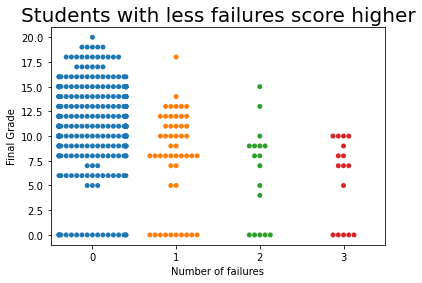

In [28]:
b = sns.swarmplot(x=student_corr['failures'],y=student_corr['G3'])
b.axes.set_title('Students with less failures score higher', fontsize = 20)
b.set_xlabel('Number of failures', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

The pattern here is clear: students with less failures score higher in the final grade. This is an intuitive observation that is proven by the empirical data as we have explored above. 

Next, we want to find out if students with educated families result in higher grades. 

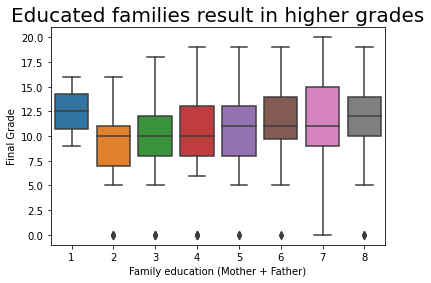

In [29]:
family_ed = student_corr['Fedu'] + student_corr['Medu'] 
b = sns.boxplot(x=family_ed,y=student_corr['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 20)
b.set_xlabel('Family education (Mother + Father)', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

There seems to be a slight trend that with the increase in family education as the grade moves up (apart from the unusual high value at family_ed = 1). Maybe students whose parents did not get to study have more motivation. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot b

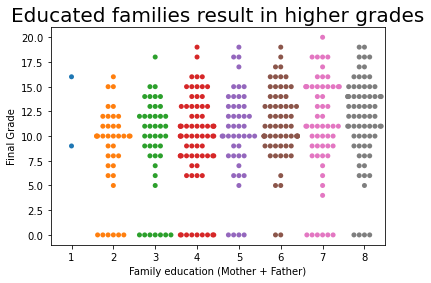

In [30]:
b = sns.swarmplot(x=family_ed,y=student_corr['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 20)
b.set_xlabel('Family education (Mother + Father)', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

As we can see here, there are only 2 points in family_ed=1, hence our conclusion was faulty. Likewise, it is always advisable to try out different analysis methods to confirm our conclusions from the initial findings. 

Next, we want to find out if going out with friends often results in higher or lower grades. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


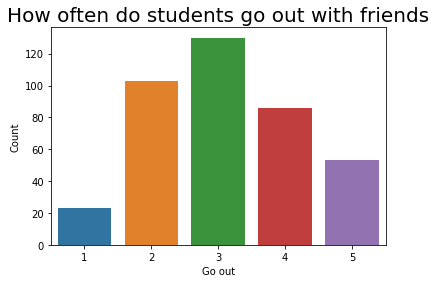

In [31]:
b = sns.countplot(student_corr['goout'])
b.axes.set_title('How often do students go out with friends', fontsize = 20)
b.set_xlabel('Go out', fontsize = 10)
b.set_ylabel('Count', fontsize = 10)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


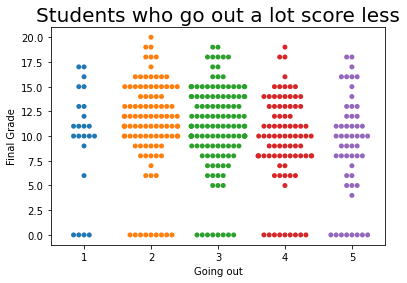

In [32]:
b = sns.swarmplot(x=student_corr['goout'],y=student_corr['G3'])
b.axes.set_title('Students who go out a lot score less', fontsize = 20)
b.set_xlabel('Going out', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

This plot shows a slight downward trend, showing that there is a slight trend of students getting lower grades if they hang out with their friends more. 

Next, we want to find out if having romantic relationship affect grades. 

Because of one hot encoding, we have a feature called "romantic_no". When the value is 1, it means there is no romantic relationship, and when it is 0, it means there is romantic relationship. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


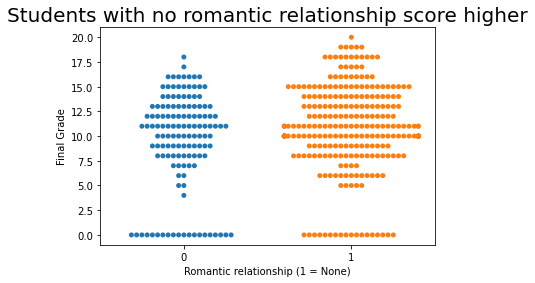

In [33]:
b = sns.swarmplot(x=student_corr['romantic_no'],y=student_corr['G3'])
b.axes.set_title('Students with no romantic relationship score higher', fontsize = 20)
b.set_xlabel('Romantic relationship (1 = None)', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

From this, there does not seem to be an obvious trend. While it may look like those with no romantic relationship gets better grades, we have to take into account that there are many students without any romantic relationships. 

## Machine learning modelling

We can frame the prediction problem in 3 ways: 

1. Binary classification: 
    * G3 > 10: pass
    * G3 < 10: fail
2. 5-level classification based on Erasmus grade conversion system:
    * 16-20: very good
    * 14-15: good
    * 12-13: satisfactory
    * 10-11: sufficient
    * 0-9: fail
3. Regression: predicting G3

In here, we will be using the third method, regression to predict G3. 

First, we will divide the data into X and y, then split them into training and test samples using "train_test_split". Remember that here, we are using only the 8 features that are most correlated with the target, "G3". 

In [34]:
X = student_corr.drop(['G3'], axis=1)
y = student_corr['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.head()

,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
343,1,2,1,0,17,2,1,0
113,0,4,1,0,15,2,2,1
355,0,3,1,0,18,3,4,0
3,0,4,1,0,15,2,2,0
174,0,3,1,0,16,3,5,1


X_test.head()

For all models, we first initialise the models, fit the models with the training samples, then create "y_pred", which is the predicted values of y on X_test, and then calculate the metrics, mean absolute error, root mean squared error, and r-squared scores, for each model. 

#### 1. Linear regression

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.103668930105181
RMSE:  4.134009798554171
R-squared:  -0.059448527005542484


#### 2. Elastic net

In [37]:
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
en.fit(X_train, y_train)

y_pred = en.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  2.7686710726257115
RMSE:  3.9155814434749896
R-squared:  0.04954976706328196


#### 3. SVM

In [38]:
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  2.9141040264307225
RMSE:  4.06406681949064
R-squared:  -0.023902345253096646


#### 4. Decision tree

In [39]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  4.485654008438819
RMSE:  6.08312207020017
R-squared:  -1.2939815532201848


Sometimes, there are negative r-squared scores, which means the model's predicted values are way off the mark in comparison to the real values. Negative r-squared scores arise when the model selected does not follow the trend of the data, therefore leading to a worse fit than the mean values of the target values to be predicted. 

#### 5. Gradient boosting

In [40]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.496494189927155
RMSE:  4.696573740859885
R-squared:  -0.36741125217743775


#### 6. Extra trees 

In [41]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train)

y_pred = et.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.8896624472573844
RMSE:  5.094469499330248
R-squared:  -0.6089212624135552


#### 7. Random forest

In [42]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.6586758666790313
RMSE:  4.84804654652635
R-squared:  -0.4570364616006348


#### 8. MLP (Multi-layer perceptron)

In [43]:
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.044678198303011
RMSE:  4.085248653220838
R-squared:  -0.03460327574635902


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


So far, we have used these models without much regularisation imposed. The highest r-squared score achieved is the SVM model. However, the r-squared scores of 0.125 is such a low score that it is akin to saying that the model was not able to predict anything well. But to make things clearer, what if we compare the predicted values with the actual values side-by-side? We will try this with the results from MLP.

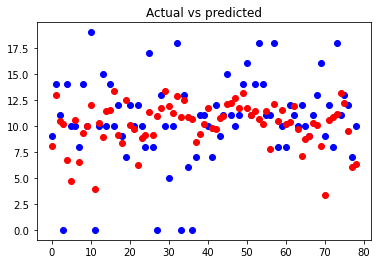

In [44]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.title('Actual vs predicted')
plt.show()

The blue points are the actual values and the red points are the predicted values. As we can see, the model is predicting very close to the mean, which is why the r-squared score is quite low. 

In [45]:
comparison = pd.DataFrame(data={'Predictions': y_pred, 'Actual': y_test})
comparison.head()

,Predictions,Actual
390,8.029221,9
298,13.015245,14
43,10.487751,11
333,10.194781,0
151,6.702237,14


Looking at this short snippet of the predicted and actual values, we can see that the predictions for most of them are quite off. With these features, we can deduce that the model is not able to predict the grades of the students well. 

But what if we use all features including one-hot encoded features? 

## Regression with all features

We will now try the same prediction with all features including the dummy variables made from one-hot encoding. 

In [46]:
student.shape

(395, 55)

In [47]:
X = student.drop(['G3'], axis=1)
y = student['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 1. Linear regression

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.458539359177215
RMSE:  4.579610734380241
R-squared:  0.06165615246744616


#### 2. Elastic net

In [49]:
en = ElasticNet()
en.fit(X_train, y_train)

y_pred = en.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.461185036702377
RMSE:  4.550140987053795
R-squared:  0.0736937622523196


#### 3. SVM

In [50]:
svm = SVR()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.538002474497278
RMSE:  4.620922738445229
R-squared:  0.04465046652023885


#### 4. Decision tree

In [51]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.8987341772151898
RMSE:  5.504888506441746
R-squared:  -0.3558196885842917


#### 5. Gradient boosting

In [52]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.2933295993388283
RMSE:  4.1699093292406495
R-squared:  0.22203850010233905


#### 6. Extra trees

In [53]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train)

y_pred = et.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.317848101265822
RMSE:  4.236755535590227
R-squared:  0.19689617827545658


#### 7. Random forest

In [54]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.1092405063291144
RMSE:  3.977591504568461
R-squared:  0.29214347417773034


#### 8. MLP

In [55]:
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.5265192050274154
RMSE:  4.445206796421608
R-squared:  0.11592558804598962


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


From the results above, we can see that the prediction actually improved by using all features. Random forest is now the best model with r-squared score of 0.324. However, we do not know if this r-squared score can be considered good for this context. Given the problem at hand, we can be tempted to claim the model to be not good in predicting. However, we need further validation to prove this point. 

We will use the results from the random forest model for our next analyses. 

In [56]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

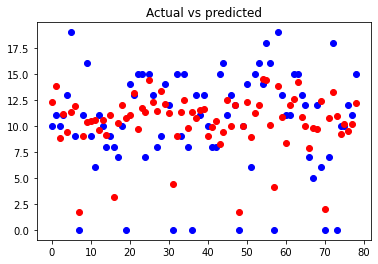

In [57]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.title('Actual vs predicted')
plt.show()

Just by looking at this, we can deduce that the prediction is better than when we were using only 8 features. There are still points where the model predicted clearly wrong, but the predicted points are closer to the actual ones than before. 

In [58]:
comparison = pd.DataFrame(data={'Predictions': y_pred, 'Actual': y_test})
comparison.head()

,Predictions,Actual
382,12.33,10
257,13.82,11
362,8.82,10
81,11.10,11
223,9.39,13


Just like what we can observe from the plot above, it seems that the model is not predicting the higher values properly. In fact, apart from some low scores, the model is still predicting quite close to the mean values. Therefore, we can deduce that the model's prediction is still not that good enough. 

### Feature importance

One good thing about random forest model is that we can decipher the most important features in predicting the target. In random forest, feature importance is calculated by computing how much each feature contributes to decreasing the weighted impurity. The impurity in classification trees is Gini impurity/information gain (entropy), whereas in regression trees, the impurity is measured in variance. 

Feature: 0, Score: 0.04400
Feature: 1, Score: 0.03667
Feature: 2, Score: 0.02815
Feature: 3, Score: 0.02155
Feature: 4, Score: 0.02982
Feature: 5, Score: 0.12925
Feature: 6, Score: 0.02593
Feature: 7, Score: 0.03731
Feature: 8, Score: 0.04485
Feature: 9, Score: 0.01364
Feature: 10, Score: 0.02842
Feature: 11, Score: 0.04484
Feature: 12, Score: 0.17961
Feature: 13, Score: 0.01394
Feature: 14, Score: 0.01619
Feature: 15, Score: 0.00655
Feature: 16, Score: 0.00461
Feature: 17, Score: 0.00794
Feature: 18, Score: 0.00732
Feature: 19, Score: 0.00402
Feature: 20, Score: 0.00737
Feature: 21, Score: 0.01367
Feature: 22, Score: 0.00818
Feature: 23, Score: 0.01005
Feature: 24, Score: 0.01560
Feature: 25, Score: 0.00539
Feature: 26, Score: 0.00817
Feature: 27, Score: 0.00131
Feature: 28, Score: 0.00711
Feature: 29, Score: 0.00631
Feature: 30, Score: 0.01518
Feature: 31, Score: 0.00778
Feature: 32, Score: 0.00719
Feature: 33, Score: 0.00566
Feature: 34, Score: 0.01166
Feature: 35, Score: 0.00551
Fe

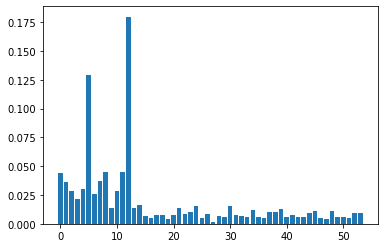

In [59]:
importance = rf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 33 to 271
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                316 non-null    int64
 1   Medu               316 non-null    int64
 2   Fedu               316 non-null    int64
 3   traveltime         316 non-null    int64
 4   studytime          316 non-null    int64
 5   failures           316 non-null    int64
 6   famrel             316 non-null    int64
 7   freetime           316 non-null    int64
 8   goout              316 non-null    int64
 9   Dalc               316 non-null    int64
 10  Walc               316 non-null    int64
 11  health             316 non-null    int64
 12  absences           316 non-null    int64
 13  sex_F              316 non-null    uint8
 14  sex_M              316 non-null    uint8
 15  address_R          316 non-null    uint8
 16  address_U          316 non-null    uint8
 17  famsize_GT3    

From here, we can see that the features "absences" and "goout" are most important in using random forest. 

However, it is quite evident so far that our predictions are not good enough. We need to improve the model by other means. What if we include "G1" and "G2" features? What implications are there in terms of the problem at hand? What if we used some standardisation tools before putting the data into the model? What if we applied hyperparameter tuning to the models? 

## Assignment

Using the same data, you are to try the same problem as above, regression prediction of students' final grades (G3), but with some additional steps: 

1. Apply standard scaling, robust scaling, and min-max scaling to the features and try predicting the final grade (G3). 
2. Apply hyperparameter tuning to the models and explain the differences in performances. 
3. Include "G1" and "G2" features to the features and explain the differences in performances. 
4. Explain and justify whether "G1" and "G2" features should be added or not. 

#### 1.Apply standard scaling, robust scaling, and min-max scaling to the features and try predicting the final grade (G3)

#### StandardScaler

In [61]:
ss=StandardScaler()  #array로 넣어줘도 됨
X_train_sc=ss.fit_transform(X_train) #train은 fit과 transform을 해준다. 
X_test_sc=ss.transform(X_test) #test는 단순 trasnform을 해준다. 


#### 1. Linear Regression

In [62]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

y_pred = lr.predict(X_test_sc)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.6234498585965644
RMSE:  4.63703421229945
R-squared:  0.03797694125004969


#### 2. Elastic net

In [63]:
en = ElasticNet()
en.fit(X_train_sc, y_train)

y_pred = en.predict(X_test_sc)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.4077924900060346
RMSE:  4.474615798794876
R-squared:  0.10418901271232073


#### 3. SVM

In [64]:
svm = SVR()
svm.fit(X_train_sc,y_train)

y_pred = svm.predict(X_test_sc)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.3681133391500064
RMSE:  4.520058373007685
R-squared:  0.08590155889246731


#### 4. Decision tree

In [65]:
dt = DecisionTreeRegressor()
dt.fit(X_train_sc, y_train)

y_pred = dt.predict(X_test_sc)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  4.0
RMSE:  5.761065302330943
R-squared:  -0.4849453732113671


#### 5. Gradient boosting

In [66]:
gb = GradientBoostingRegressor()
gb.fit(X_train_sc, y_train)

y_pred = gb.predict(X_test_sc)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.274149102608598
RMSE:  4.168054386034546
R-squared:  0.22273048322052957


#### 6. Extra trees

In [67]:
et = ExtraTreesRegressor()
et.fit(X_train_sc, y_train)

y_pred = et.predict(X_test_sc)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.347594936708862
RMSE:  4.306087242703305
R-squared:  0.17039658618415388


#### 7. Random forest

In [68]:
rf = RandomForestRegressor()
rf.fit(X_train_sc, y_train)

y_pred = rf.predict(X_test_sc)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.0905063291139245
RMSE:  4.015764347062616
R-squared:  0.27849171780460535


#### 8. MLP

In [69]:
mlp = MLPRegressor()
mlp.fit(X_train_sc, y_train)

y_pred = mlp.predict(X_test_sc)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.407761698917414
RMSE:  4.318976454917724
R-squared:  0.16542272607194497


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 7. Random forest의 결과 R squared 값이 가장 크므로 이를 이용해 예측값을 구한다. 

In [70]:
rf = RandomForestRegressor()
rf.fit(X_train_sc, y_train)

y_pred = rf.predict(X_test_sc)

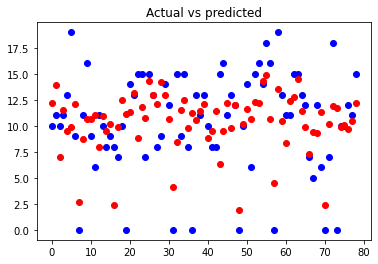

In [71]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.title('Actual vs predicted')
plt.show()

In [72]:
comparison = pd.DataFrame(data={'Predictions': y_pred, 'Actual': y_test})
comparison.head()

,Predictions,Actual
382,12.16,10
257,13.90,11
362,7.04,10
81,11.55,11
223,9.49,13


#### MinMaxScaler

In [73]:
mms=MinMaxScaler()
X_train_mms=mms.fit_transform(X_train)
X_test_mms=mms.transform(X_test)


#### 1. Linear Regression

In [74]:
lr.fit(X_train_mms,y_train)
y_pred = lr.predict(X_test_mms)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.4501582278481013
RMSE:  4.599597748303925
R-squared:  0.053447761565179275


#### 2. Elastic net

In [75]:
en = ElasticNet()
en.fit(X_train_mms, y_train)

y_pred = en.predict(X_test_mms)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.664516904342253
RMSE:  4.729454465891887
R-squared:  -0.0007531793938002629


#### 3. SVM

In [76]:
svm.fit(X_train_mms,y_train)

y_pred = svm.predict(X_test_mms)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)   

MAE:  3.449786386268612
RMSE:  4.6106882888686265
R-squared:  0.04887760883444647


#### 4. Decision tree

In [77]:
dt = DecisionTreeRegressor()
dt.fit(X_train_mms, y_train)

y_pred = dt.predict(X_test_mms)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.8860759493670884
RMSE:  5.524399274289663
R-squared:  -0.3654474808591175


#### 5. Gradient boosting

In [78]:
gb = GradientBoostingRegressor()
gb.fit(X_train_mms, y_train)

y_pred = gb.predict(X_test_mms)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.344684055377475
RMSE:  4.196150509860805
R-squared:  0.21221629002473796


#### 6. Extra trees

In [79]:
et = ExtraTreesRegressor()
et.fit(X_train_mms, y_train)

y_pred = et.predict(X_test_mms)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.3881012658227845
RMSE:  4.366266255355739
R-squared:  0.14704658475038002


#### 7. Random forest

In [80]:
rf = RandomForestRegressor()
rf.fit(X_train_mms, y_train)

y_pred = rf.predict(X_test_mms)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.0575949367088606
RMSE:  3.9417911818764564
R-squared:  0.3048282604020299


#### 8. MLP

In [81]:
mlp = MLPRegressor()
mlp.fit(X_train_mms, y_train)

y_pred = mlp.predict(X_test_mms)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.496460100927573
RMSE:  4.539751002350565
R-squared:  0.07791926620577949


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 7. Random forest의 결과 R squared 값이 가장 크므로 이를 이용해 예측값을 구한다. 

In [82]:
rf = RandomForestRegressor()
rf.fit(X_train_mms, y_train)

y_pred = rf.predict(X_test_mms)

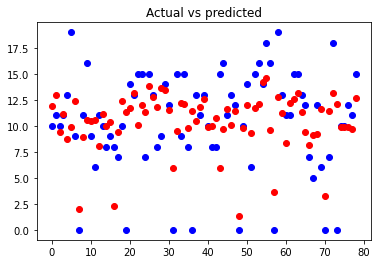

In [83]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.title('Actual vs predicted')
plt.show()

In [84]:
comparison = pd.DataFrame(data={'Predictions': y_pred, 'Actual': y_test})
comparison.head()

,Predictions,Actual
382,11.92,10
257,12.96,11
362,9.41,10
81,11.17,11
223,8.74,13


#### RobustScaler

In [85]:
from sklearn.preprocessing import RobustScaler  
rb = RobustScaler()
X_train_rb=rb.fit_transform(X_train)
X_test_rb=rb.transform(X_test)


#### 1. Linear Regression

In [86]:
lr.fit(X_train_rb,y_train)
y_pred = lr.predict(X_test_rb)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.458836036392405
RMSE:  4.579238602483987
R-squared:  0.06180864293371269


#### 2. Elastic net

In [87]:
en = ElasticNet()
en.fit(X_train_rb, y_train)

y_pred = en.predict(X_test_rb)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.4761739386191417
RMSE:  4.5487372421799055
R-squared:  0.07426521577954448


#### 3. SVM

In [88]:
svm.fit(X_train_rb,y_train)

y_pred = svm.predict(X_test_rb)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)   

MAE:  3.361154230628865
RMSE:  4.487028258300257
R-squared:  0.09921221009742887


#### 4. Decision tree

In [89]:
dt = DecisionTreeRegressor()
dt.fit(X_train_rb, y_train)

y_pred = dt.predict(X_test_rb)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  4.10126582278481
RMSE:  5.830951894845301
R-squared:  -0.521191179422476


#### 5. Gradient boosting

In [90]:
gb = GradientBoostingRegressor()
gb.fit(X_train_rb, y_train)

y_pred = gb.predict(X_test_rb)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.311055590186101
RMSE:  4.1872524237492765
R-squared:  0.21555379426438825


#### 6. Extra trees

In [91]:
et = ExtraTreesRegressor()
et.fit(X_train_rb, y_train)

y_pred = et.predict(X_test_rb)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.338101265822785
RMSE:  4.321118731139841
R-squared:  0.1645945953889829


#### 7. Random forest

In [92]:
rf = RandomForestRegressor()
rf.fit(X_train_rb, y_train)

y_pred = rf.predict(X_test_rb)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.032025316455696
RMSE:  3.929011696520183
R-squared:  0.3093285170475726


#### 8. MLP

In [93]:
mlp = MLPRegressor()
mlp.fit(X_train_rb, y_train)

y_pred = mlp.predict(X_test_rb)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.5842419794668854
RMSE:  4.736098394207646
R-squared:  -0.00356686652714866


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 7. Random forest의 결과 R squared 값이 가장 크므로 이를 이용해 예측값을 구한다. 

In [94]:
rf = RandomForestRegressor()
rf.fit(X_train_rb, y_train)

y_pred = rf.predict(X_test_rb)

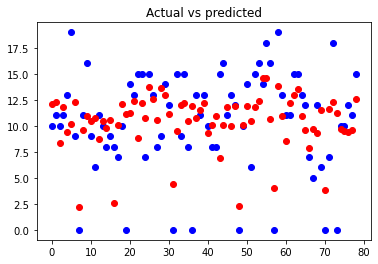

In [95]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.title('Actual vs predicted')
plt.show()

In [96]:
comparison = pd.DataFrame(data={'Predictions': y_pred, 'Actual': y_test})
comparison.head()

,Predictions,Actual
382,12.07,10
257,12.32,11
362,8.38,10
81,11.84,11
223,9.42,13


#### 2.Apply hyperparameter tuning to the models and explain the differences in performances.

In [97]:
from sklearn.metrics import make_scorer
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    predict = np.log(predict + 1)
    actual = np.log(actual + 1)
    
    difference_square_mean = np.square(predict - actual).mean()
    score = np.sqrt(difference_square_mean)
    return score

rmsle_scorer = make_scorer(rmsle)    #  make your own scoring function
rmsle_scorer

make_scorer(rmsle)

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

hyperparameters_list = []

n_estimators = 30
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.69509
Score = 0.72050
Score = 0.71736
Score = 0.69899
Score = 0.68213
Score = 0.70673
Score = 0.73845
Score = 0.69862
Score = 0.72413
Score = 0.71549
(10, 4)


,score,n_estimators,max_depth,max_features
4,0.682131,30,16,0.964420
0,0.695094,30,64,0.815285
7,0.698625,30,65,0.497473
3,0.698985,30,80,0.742561
5,0.706730,30,95,0.339817


In [99]:
from sklearn.model_selection import GridSearchCV

params = [{"max_depth":[10, 20, 30], 
           "max_features":[0.3, 0.5, 0.9]}]

# grid search
clf = GridSearchCV(RandomForestRegressor(), params, cv=3, n_jobs=-1)
clf.fit(X_train, y_train)
print("best values: ", clf.best_estimator_)
print("best score: ", clf.best_score_)

# final evaluation on test data
score = clf.score(X_test, y_test)
print("final score: ", score)

best values:  RandomForestRegressor(max_depth=30, max_features=0.3)
best score:  0.24128658733390038
final score:  0.2562035485906


In [100]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']  # log2
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomizedSearchCV(RandomForestRegressor(), random_grid, 
                               cv = 3, n_jobs = -1) # n_iter default 10
# Fit the random search model
rf.fit(X_train, y_train)

print(rf.best_params_, rf.best_estimator_, rf.best_score_)
score = rf.score(X_test, y_test)
print(score)

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False} RandomForestRegressor(bootstrap=False, max_depth=110, max_features='sqrt',
                      min_samples_split=5, n_estimators=1000) 0.22554230300226852
0.2319143901424452


#### 3.Include "G1" and "G2" features to the features and explain the differences in performances

In [101]:
student1= pd.read_csv('student-mat.csv') #새로운 data frame을 만든다. 
student1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [102]:
most_correlated = student1.corr().abs()['G3'].sort_values(ascending=False)

# will use the top 8 most correlated features with grade
most_correlated = most_correlated[:9]
most_correlated

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
Name: G3, dtype: float64

In [103]:
student1_corr = student1.loc[:, most_correlated.index]
student1_corr.head()

,G3,G2,G1,failures,Medu,age,Fedu,goout,traveltime
0,6,6,5,0,4,18,4,4,2
1,6,5,5,0,1,17,1,3,1
2,10,8,7,3,1,15,1,2,1
3,15,14,15,0,4,15,2,2,1
4,10,10,6,0,3,16,3,2,1


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.8% of the points cann

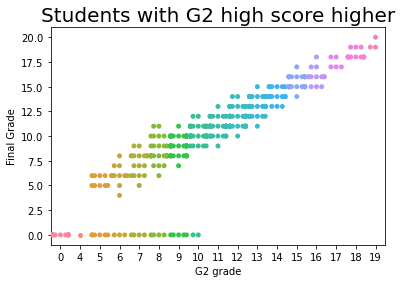

In [104]:
b = sns.swarmplot(x=student1_corr['G2'],y=student1_corr['G3'])
b.axes.set_title('Students with G2 high score higher', fontsize = 20)
b.set_xlabel('G2 grade', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.9% of the points cann

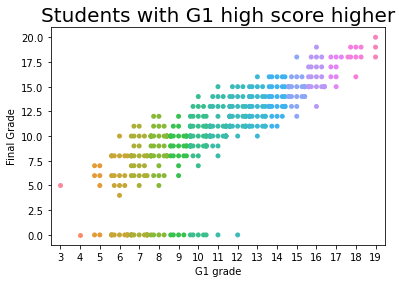

In [105]:
c = sns.swarmplot(x=student1_corr['G1'],y=student1_corr['G3'])
c.axes.set_title('Students with G1 high score higher', fontsize = 20)
c.set_xlabel('G1 grade', fontsize = 10)
c.set_ylabel('Final Grade', fontsize = 10)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.1% of the points cann

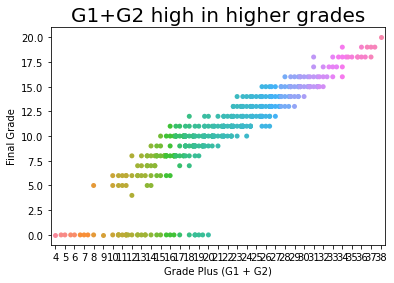

In [106]:
grade_ed = student1_corr['G1'] + student1_corr['G2'] 
b = sns.swarmplot(x=grade_ed,y=student1_corr['G3'])
b.axes.set_title('G1+G2 high in higher grades', fontsize = 20)
b.set_xlabel('Grade Plus (G1 + G2)', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

In [107]:
X = student1_corr.drop(['G3'], axis=1)
y = student1_corr['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
X_train.head()

,G2,G1,failures,Medu,age,Fedu,goout,traveltime
215,15,14,0,3,17,2,4,2
353,8,8,1,1,19,1,4,3
376,14,15,2,4,20,2,3,2
60,11,10,0,4,16,4,4,1
295,12,14,0,3,17,3,3,1


In [109]:
X_test.head()

,G2,G1,failures,Medu,age,Fedu,goout,traveltime
39,13,14,0,2,15,2,1,1
221,5,6,1,1,17,1,4,1
154,11,11,0,4,17,4,1,1
100,7,7,0,4,16,4,5,1
255,9,7,1,1,17,1,4,2


In [110]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  1.3537173407378702
RMSE:  2.2310731443842275
R-squared:  0.796111029290833


In [111]:
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
en.fit(X_train, y_train)

y_pred = en.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  1.3327456019646395
RMSE:  2.2635890067489086
R-squared:  0.7901247297297794


In [112]:
svm = SVR()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  1.4609696554177025
RMSE:  2.429025612054382
R-squared:  0.7583257917692603


In [113]:
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  1.9704770247412051
RMSE:  3.270558393327524
R-squared:  0.5618629989223678


In [114]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  1.7468354430379747
RMSE:  3.1057317366851187
R-squared:  0.6049118569759657


In [115]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  1.558325308297937
RMSE:  2.587012238808918
R-squared:  0.7258658865330465


In [116]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train)

y_pred = et.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  1.5010759493670887
RMSE:  2.374417250291324
R-squared:  0.7690700860100023


In [117]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  1.5364345991561184
RMSE:  2.390175401381055
R-squared:  0.7659947175715055


In [118]:
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  1.3628559528409878
RMSE:  2.2207238696742135
R-squared:  0.7979982008595617


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 모든 부분에서 perfomance를 나타내는 R-squared 값이 상승한 것을 알 수 있다.  linear Regression값이 가장 큼으로 예측에 사용한다. 

In [119]:
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


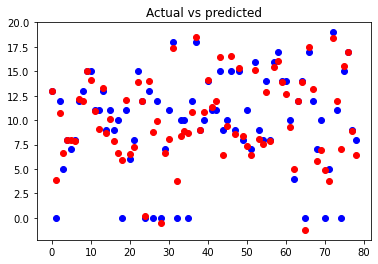

In [120]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.title('Actual vs predicted')
plt.show()

In [121]:
comparison = pd.DataFrame(data={'Predictions': y_pred, 'Actual': y_test})
comparison.head()

,Predictions,Actual
39,13.001097,13
221,3.870005,0
154,10.724069,12
100,6.661072,5
255,8.016738,8


#### 4.Explain and justify whether "G1" and "G2" features should be added or not.

#### G1과 G2 feature가 포함되었을 때 perfomance 값이 크게 향상된 것을 목격할 수 있다. 그러므로 G1과 G2값은 포함되어야 한다. 